In [7]:
from zipfile import ZipFile
file_name = "data.zip"

In [8]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [9]:
# Path to the extracted data folder
data_folder = "data"

In [10]:
def load_data(folder):
    X, y = [], []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        label = 1 if subfolder == "planes" else 0  # Assign label 1 to planes and 0 to cars
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)
            image = Image.open(image_path)
            image = image.resize((224, 224))
            X.append(np.array(image))
            y.append(label)
    return np.array(X), np.array(y)

In [11]:
import os
import numpy as np
from PIL import Image


In [12]:
# Path to the extracted data folder
data_folder = "data"

In [13]:
# Load training data
X_train, y_train = load_data(os.path.join(data_folder, "train"))

# Load testing data
X_test, y_test = load_data(os.path.join(data_folder, "test"))

In [14]:
# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

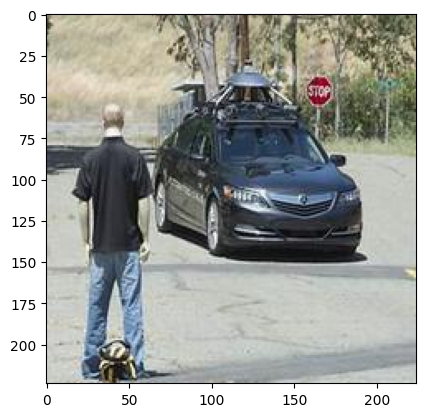

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[399])

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 224, 224, 3), (100, 224, 224, 3), (400,), (100,))

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, Dense


In [18]:
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [20]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.05),loss='binary_crossentropy',
             metrics = ['accuracy'])

In [21]:
 model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 16s 260ms/step - loss: 2100.2881 - accuracy: 0.5050 - val_loss: 0.6862 - val_accuracy: 0.4900
Epoch 2/30
13/13 [==============================] - 1s 108ms/step - loss: 0.6966 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
13/13 [==============================] - 1s 102ms/step - loss: 0.6944 - accuracy: 0.4300 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
13/13 [==============================] - 1s 98ms/step - loss: 0.6951 - accuracy: 0.4875 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/30
13/13 [==============================] - 1s 99ms/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/30
13/13 [==============================] - 1s 102ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/30
13/13 [==============================] - 1s 101ms/step - loss: 0.6943 - accuracy: 0.4850 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoc

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 0.5


**Increase the number of Convolutional layers**

In [23]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 256)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [25]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.05),loss='binary_crossentropy',
             metrics = ['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 11s 442ms/step - loss: 50390.7812 - accuracy: 0.5050 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/30
13/13 [==============================] - 3s 205ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/30
13/13 [==============================] - 3s 198ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
13/13 [==============================] - 3s 210ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/30
13/13 [==============================] - 3s 196ms/step - loss: 0.7004 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/30
13/13 [==============================] - 3s 206ms/step - loss: 0.7017 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 7/30
13/13 [==============================] - 3s 195ms/step - loss: 0.6966 - accuracy: 0.4750 - val_loss: 0.6942 - val_accuracy: 0.5000
E

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 51ms/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 0.5


Add BatchNormalization after Conv2D layer

In [28]:
from keras.layers import BatchNormalization

In [29]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 256)    1024      
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 256)    0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 128)    512       
 hNormalization)                                                 
                                                      

In [31]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.05),loss='binary_crossentropy',
             metrics = ['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 5s 336ms/step - loss: 37.0454 - accuracy: 0.6800 - val_loss: 35065.7031 - val_accuracy: 0.5000
Epoch 2/30
13/13 [==============================] - 4s 312ms/step - loss: 6.4725 - accuracy: 0.6725 - val_loss: 1337.1036 - val_accuracy: 0.5000
Epoch 3/30
13/13 [==============================] - 4s 309ms/step - loss: 1.1628 - accuracy: 0.8200 - val_loss: 1003.1509 - val_accuracy: 0.5000
Epoch 4/30
13/13 [==============================] - 4s 309ms/step - loss: 0.5896 - accuracy: 0.8175 - val_loss: 437.3917 - val_accuracy: 0.5000
Epoch 5/30
13/13 [==============================] - 4s 315ms/step - loss: 0.4593 - accuracy: 0.8475 - val_loss: 178.8660 - val_accuracy: 0.5100
Epoch 6/30
13/13 [==============================] - 4s 304ms/step - loss: 0.3818 - accuracy: 0.8425 - val_loss: 85.7072 - val_accuracy: 0.5200
Epoch 7/30
13/13 [==============================] - 4s 305ms/step - loss: 0.3875 - accuracy: 0.8600 - val_loss: 43.6737 - val_accura

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 62ms/step - loss: 0.6894 - accuracy: 0.7600
Test Accuracy: 0.7599999904632568
